# Modelo de Previsão de Preço de Imóveis no Airbnb

Airbnb é um aplicativo onde qualquer pessoa que tenha um quarto ou um imóvel pode ofertar o seu imóvel para ser alugado por diária.

### Nosso objetivo

Construir um modelo de previsão de preço que nos permita calcular o "valor justo" de um imóvel ou quarto do app. Podendo identificar imóveis caros e/ou baratos.

### Fonte

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro disponibilizada no site pelo o usuário Allan Bruno de onde também houve inspiração do seu projeto no kaggle: https://www.kaggle.com/allanbruno/helping-regular-people-price-listings-on-airbnb

- As bases de dados são os preços dos imóveis obtidos e suas respectivas características em cada mês.
- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados

### Fatores de maior impacto

- Espera-se efeitos advindos do período de aluguel (Ex: maior demanda na época de fim de ano)
- A localização do imóvel
- Adicionais/Comodidades

Vamos descobrir o quanto esses fatores impactam e se temos outros fatores não tão intuitivos que são extremamente importantes.

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
import plotly.express as px

### Base de Dados

In [4]:
meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

caminho = pathlib.Path('/kaggle/input/airbnb-rio-de-janeiro')

df = pd.DataFrame()

for arquivo in caminho.iterdir():
    nome_mes = arquivo.name[:3]
    if nome_mes != 'tot': # all datasets but "Total"
        mes = meses[nome_mes]

        ano = arquivo.name[-8:]
        ano = int(ano.replace('.csv', ''))

        df_mes = pd.read_csv(caminho / arquivo.name)
        df_mes['year'] = ano
        df_mes['month'] = mes
        df =  pd.concat([df, df_mes], ignore_index = True)

del df_mes

display(df)

/tmp/ipykernel_42/4252644710.py:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mes = pd.read_csv(caminho / arquivo.name)
/tmp/ipykernel_42/4252644710.py:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mes = pd.read_csv(caminho / arquivo.name)
/tmp/ipykernel_42/4252644710.py:15: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mes = pd.read_csv(caminho / arquivo.name)
/tmp/ipykernel_42/4252644710.py:15: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mes = pd.read_csv(caminho / arquivo.name)
/tmp/ipykernel_42/4252644710.py:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mes = pd.read_csv(caminho / arquivo.name)
/tmp/ipykernel_42/4252644710.py:15: DtypeWarning: Columns (61,

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,year,month
0,17878,https://www.airbnb.com/rooms/17878,20190211015002,2019-02-11,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.11,2019,2
1,25026,https://www.airbnb.com/rooms/25026,20190211015002,2019-02-11,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,strict_14_with_grace_period,t,t,3,3.0,0.0,0.0,2.12,2019,2
2,31560,https://www.airbnb.com/rooms/31560,20190211015002,2019-02-11,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.30,2019,2
3,34608,https://www.airbnb.com/rooms/34608,20190211015002,2019-02-11,São-Conrado House with Ocean View,NaN,Its a House inside a very good condo with 2...,Its a House inside a very good condo with 2...,none,NaN,...,strict_14_with_grace_period,f,f,8,5.0,3.0,0.0,NaN,2019,2
4,35636,https://www.airbnb.com/rooms/35636,20190211015002,2019-02-11,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,strict_14_with_grace_period,t,t,1,1.0,0.0,0.0,2.15,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,27781098,https://www.airbnb.com/rooms/27781098,20180816030859,2018-08-16,Aconchegante,NaN,NaN,NaN,none,NaN,...,moderate,f,f,3,NaN,NaN,NaN,NaN,2018,8
902206,27783852,https://www.airbnb.com/rooms/27783852,20180816030859,2018-08-16,Apartamento Duplex luxo,NaN,NaN,NaN,none,NaN,...,flexible,f,f,1,NaN,NaN,NaN,NaN,2018,8
902207,27784477,https://www.airbnb.com/rooms/27784477,20180816030859,2018-08-16,Apartamento Praia de Botafogo,"Apartamento na Praia de Botafogo, uma quadra d...",NaN,"Apartamento na Praia de Botafogo, uma quadra d...",none,NaN,...,flexible,f,f,1,NaN,NaN,NaN,NaN,2018,8
902208,27785105,https://www.airbnb.com/rooms/27785105,20180816030859,2018-08-16,"Apartamento Amplo, próximo ao metrô","Apartamento confortável, arejado, com estação ...",NaN,"Apartamento confortável, arejado, com estação ...",none,A Tijuca é um bairro tranquilo e possui tudo à...,...,flexible,f,f,1,NaN,NaN,NaN,NaN,2018,8


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902210 entries, 0 to 902209
Data columns (total 108 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    id                                            int64  
 1    listing_url                                   object 
 2    scrape_id                                     int64  
 3    last_scraped                                  object 
 4    name                                          object 
 5    summary                                       object 
 6    space                                         object 
 7    description                                   object 
 8    experiences_offered                           object 
 9    neighborhood_overview                         object 
 10   notes                                         object 
 11   transit                                       object 
 12   access                                    

### Se tivermos muitas colunas, já vamos identificar quais colunas podemos excluir

Após análise em excel, foram escolhidas os principais atributos para o modelo, apagando as colunas não relevantes como informações repetidas, ou informações que não impactam no preço como url's e id's por exemplo

In [6]:
colunas_manter = ['host_response_time',
                'host_response_rate',
                'host_is_superhost',
                'host_listings_count',
                'latitude',
                'longitude',
                'property_type',
                'room_type',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'bed_type',
                'amenities',
                'price',
                'security_deposit',
                'cleaning_fee',
                'guests_included',
                'extra_people',
                'minimum_nights', 
                'maximum_nights',
                'number_of_reviews',
                'review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value',
                'instant_bookable',
                'cancellation_policy',
                'year',
                'month']

df = df[colunas_manter]

df.head(5)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,year,month
0,within an hour,100%,f,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,9.0,10.0,10.0,10.0,9.0,t,strict_14_with_grace_period,2019,2
1,within a day,100%,t,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,...,9.0,10.0,9.0,10.0,10.0,9.0,f,strict_14_with_grace_period,2019,2
2,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,2019,2
3,within an hour,100%,f,8.0,-22.998669,-43.271372,House,Entire home/apt,15,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,2019,2
4,within a few hours,100%,t,1.0,-22.988165,-43.193588,Apartment,Entire home/apt,3,1.5,...,10.0,10.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,2019,2


### Tratar Valores Vazios

In [7]:
df.isnull().sum()

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_score

#### Apagando coluna com mais de 300 mil valores vazios

In [8]:
for coluna in df:
    if df[coluna].isnull().sum() > 300_000:
        df = df.drop(columns = coluna)

print(df.isnull().sum())

print(f'Linhas x coluna: {df.shape}')

host_is_superhost       460
host_listings_count     460
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms              1724
bedrooms                850
beds                   2502
bed_type                  0
amenities                 0
price                     0
guests_included           0
extra_people              0
minimum_nights            0
maximum_nights            0
number_of_reviews         0
instant_bookable          0
cancellation_policy       0
year                      0
month                     0
dtype: int64
Linhas x coluna: (902210, 22)


#### Agora para colunas com poucos valores vazios, vamos simplesmente apagar essas linhas com valores vazios

In [9]:
df = df.dropna()

print(df.isnull().sum())
print(f'Linhas x coluna: {df.shape}')

host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
property_type          0
room_type              0
accommodates           0
bathrooms              0
bedrooms               0
beds                   0
bed_type               0
amenities              0
price                  0
guests_included        0
extra_people           0
minimum_nights         0
maximum_nights         0
number_of_reviews      0
instant_bookable       0
cancellation_policy    0
year                   0
month                  0
dtype: int64
Linhas x coluna: (897709, 22)


Agora temos uma base sem valores faltantes

### Verificar Tipos de Dados em cada coluna

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897709 entries, 0 to 902209
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   host_is_superhost    897709 non-null  object 
 1   host_listings_count  897709 non-null  float64
 2   latitude             897709 non-null  float64
 3   longitude            897709 non-null  float64
 4   property_type        897709 non-null  object 
 5   room_type            897709 non-null  object 
 6   accommodates         897709 non-null  int64  
 7   bathrooms            897709 non-null  float64
 8   bedrooms             897709 non-null  float64
 9   beds                 897709 non-null  float64
 10  bed_type             897709 non-null  object 
 11  amenities            897709 non-null  object 
 12  price                897709 non-null  object 
 13  guests_included      897709 non-null  int64  
 14  extra_people         897709 non-null  object 
 15  minimum_nights       8

Colunas "price" e "extra people" foram reconhecidas como texto, mas deveriam ser valores numéricos (float)

In [11]:
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(np.float32, copy=False)

df.price

0          295.0
1          160.0
2          242.0
3         3499.0
4          336.0
           ...  
902205      78.0
902206     400.0
902207      97.0
902208      43.0
902209     113.0
Name: price, Length: 897709, dtype: float32

In [12]:
df['extra_people'] = df['extra_people'].str.replace('$','')
df['extra_people'] = df['extra_people'].str.replace(',', '')
df['extra_people'] = df['extra_people'].astype(np.float32, copy=False)

df.extra_people

0         56.0
1         45.0
2         37.0
3          0.0
4         56.0
          ... 
902205     0.0
902206     0.0
902207     0.0
902208     0.0
902209     0.0
Name: extra_people, Length: 897709, dtype: float32

### Análise Exploratória e Tratar Outliers

1. Analisar Correlação
2. Analisar Outliers¹
3. Verificar a usabilidade de cada uma das nossas features

¹: Regra para identificar um outlier: Valores abaixo de (1ª Quartil - 1.5 * Amplitude) ou Valores acima de (3ª Quartil + 1.5 * Amplitude)

#### 1. Correlação entre features

<Axes: >

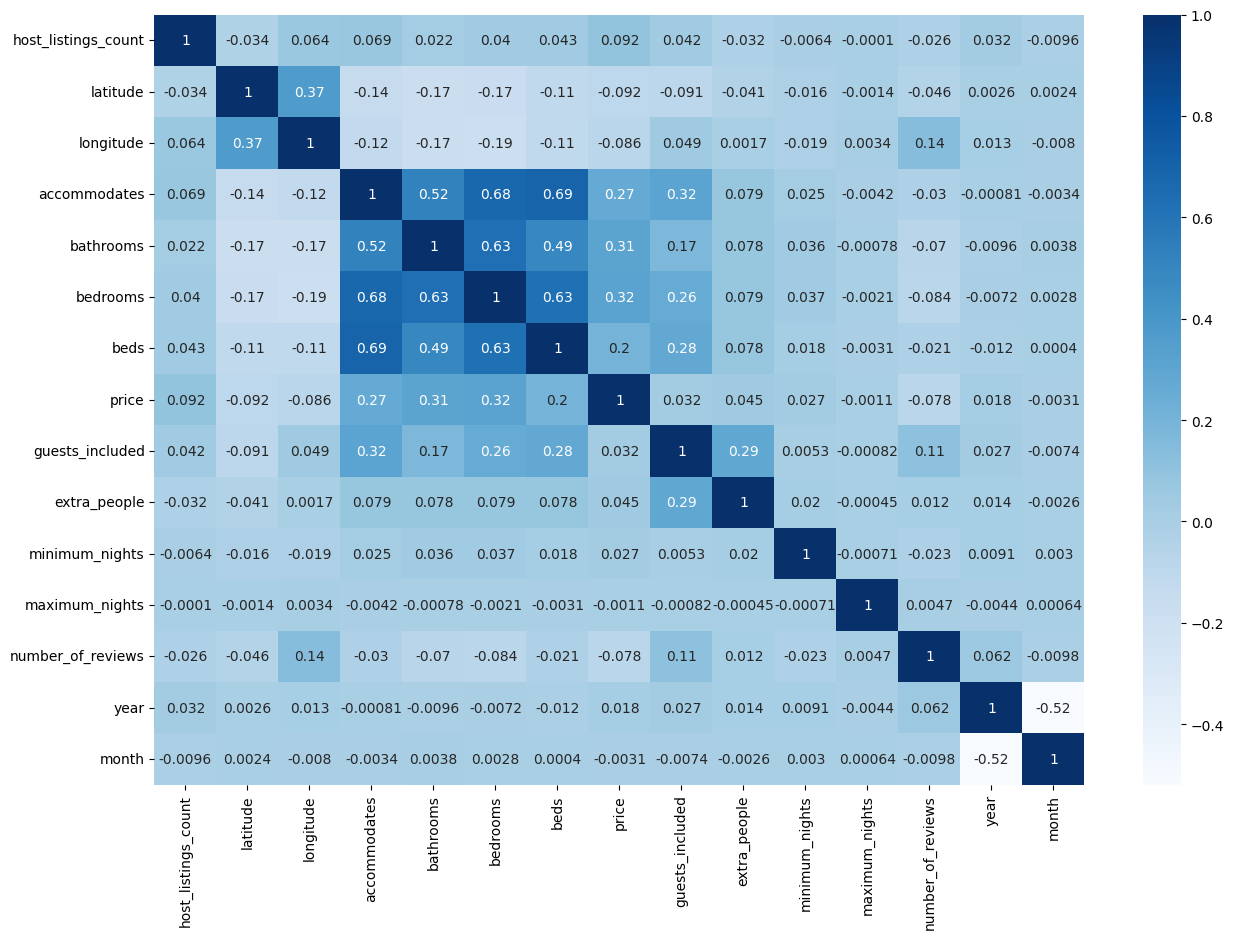

In [13]:
plt.figure(figsize=(15, 10))
correlacao = df.corr(numeric_only=True)
sns.heatmap(correlacao, annot= True, cmap= 'Blues')

#### 2. Análise de Outliers

In [14]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amp = q3-q1
    lim_inf = q1 - 1.5 * amp
    lim_sup = q3 + 1.5 * amp
    return lim_inf, lim_sup

def diagrama_caixa(coluna):
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 5)
    sns.boxplot(x=coluna, ax= ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax= ax2)

def histograma(coluna):
    plt.figure(figsize=(18, 5))
    sns.histplot(x = coluna, element= 'bars')

def excluir_outliers(df, nome_coluna):
    qtd_linhas = len(df)
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna]> lim_inf) & (df[nome_coluna]< lim_sup), :]
    qtd_linhas_removidas = qtd_linhas - len(df)
    return df, qtd_linhas_removidas

#### Price

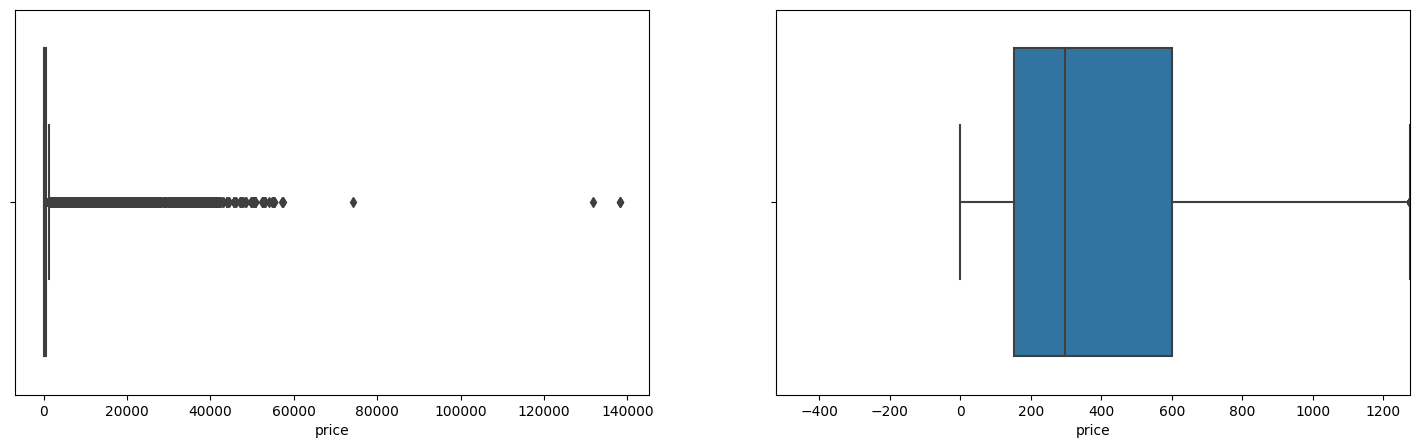

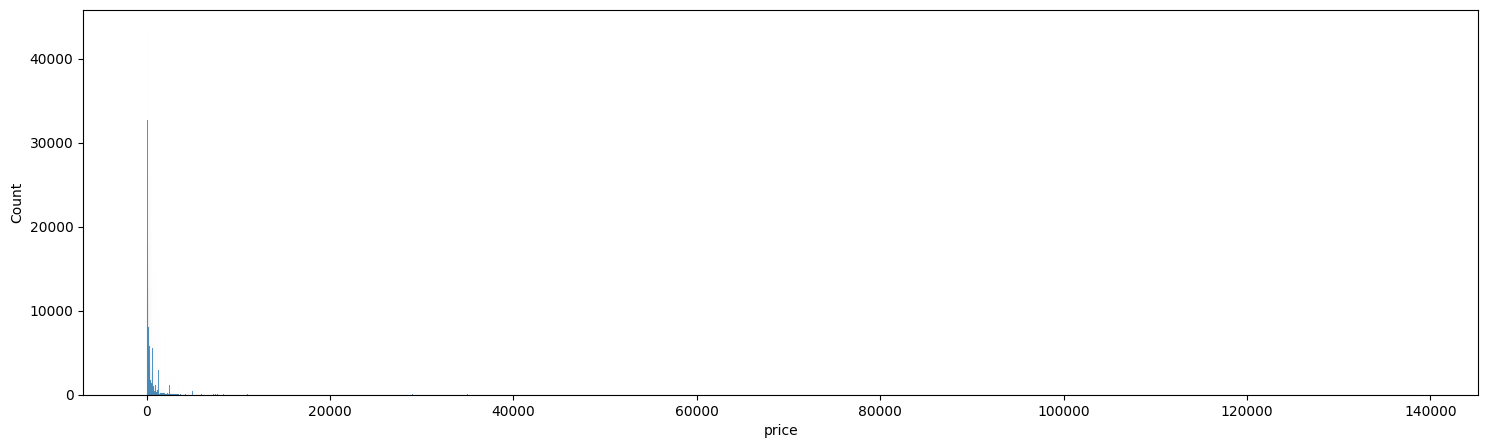

In [15]:
diagrama_caixa(df['price'])
histograma(df['price'])

Devido o objetivo do modelo ser a previsão do preço de imóveis "comuns", excluiremos os outliers pois estes devem ser imóveis de luxo com preços muito elevados

In [16]:
df, qtd_linhas_removidas = excluir_outliers(df, 'price')
print(f"Quantidade de linhas removidas: {qtd_linhas_removidas}")

Quantidade de linhas removidas: 87288


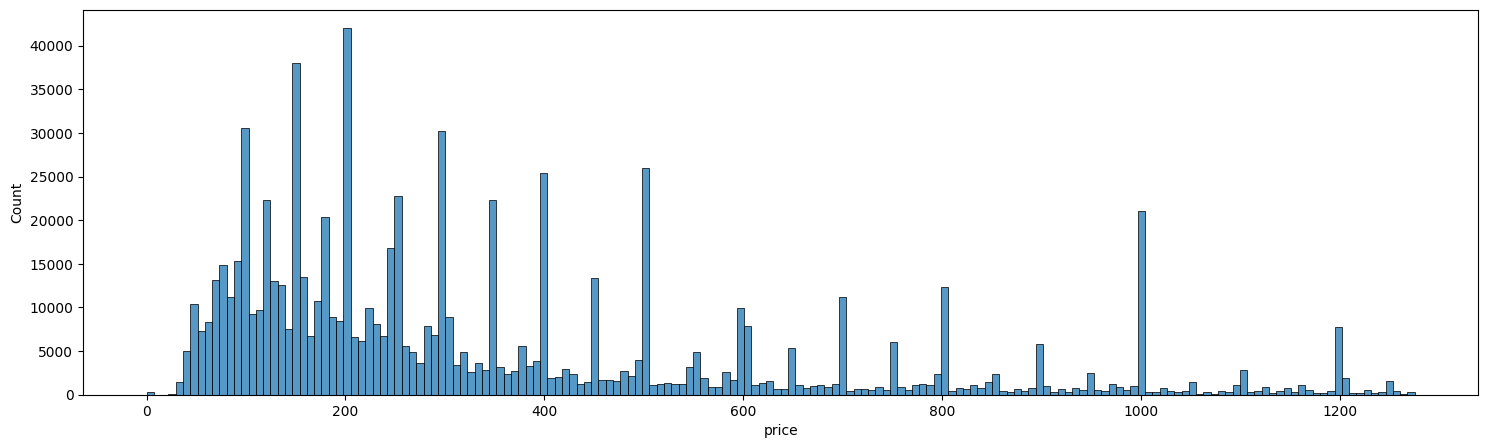

In [17]:
histograma(df['price'])

#### Extra People

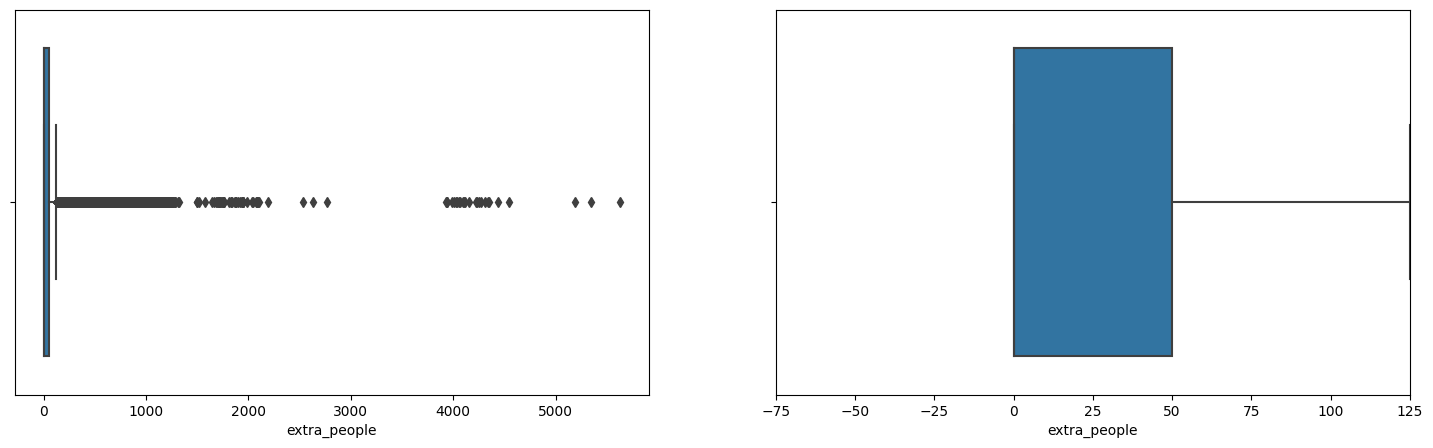

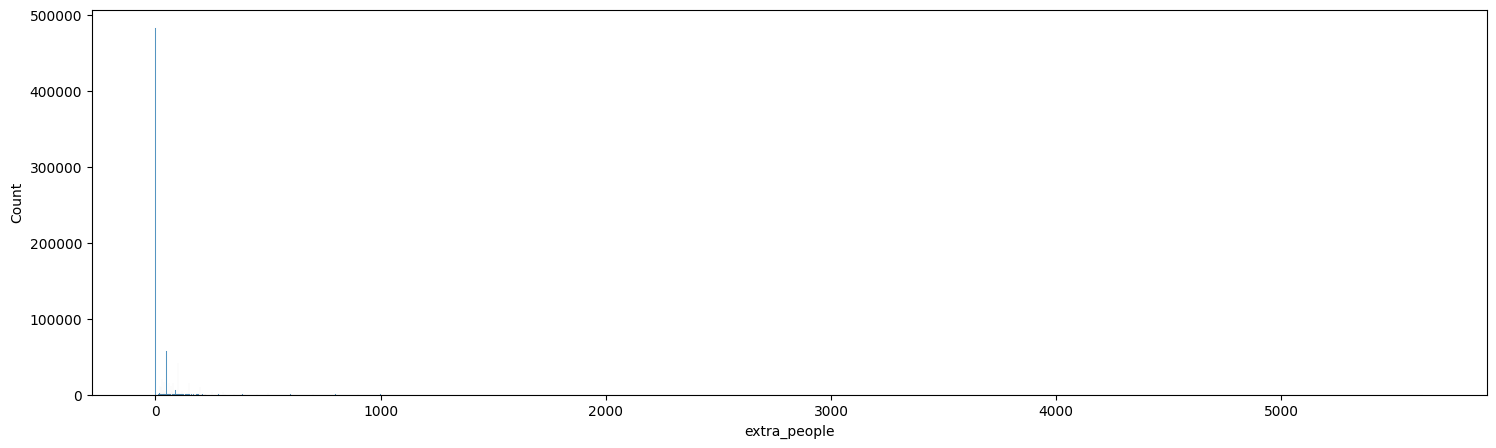

In [18]:
diagrama_caixa(df['extra_people'])
histograma(df['extra_people'])

In [19]:
df, qtd_linhas_removidas = excluir_outliers(df, 'extra_people')
print(f"Quantidade de linhas removidas: {qtd_linhas_removidas}")

Quantidade de linhas removidas: 59866


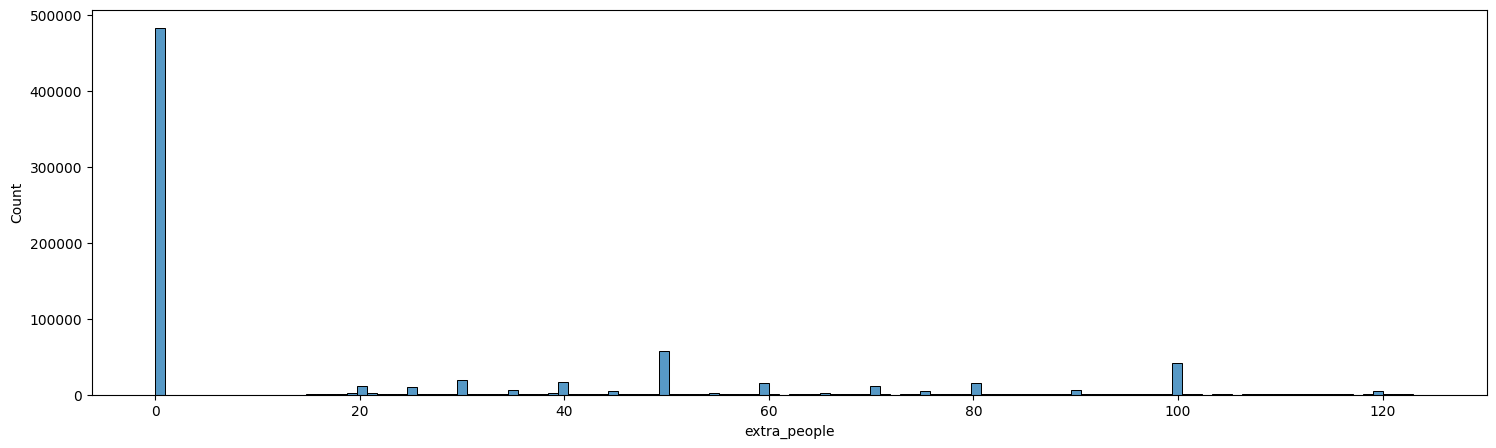

In [20]:
histograma(df['extra_people'])

### Analisando colunas com valores discretos

In [21]:
def grafico_barra(coluna):
    plt.figure(figsize=(18, 5))
    ax = sns.barplot(x = coluna.value_counts().index, y= coluna.value_counts())
    ax.set_xlim(limites(coluna))

#### Host Listing Counts

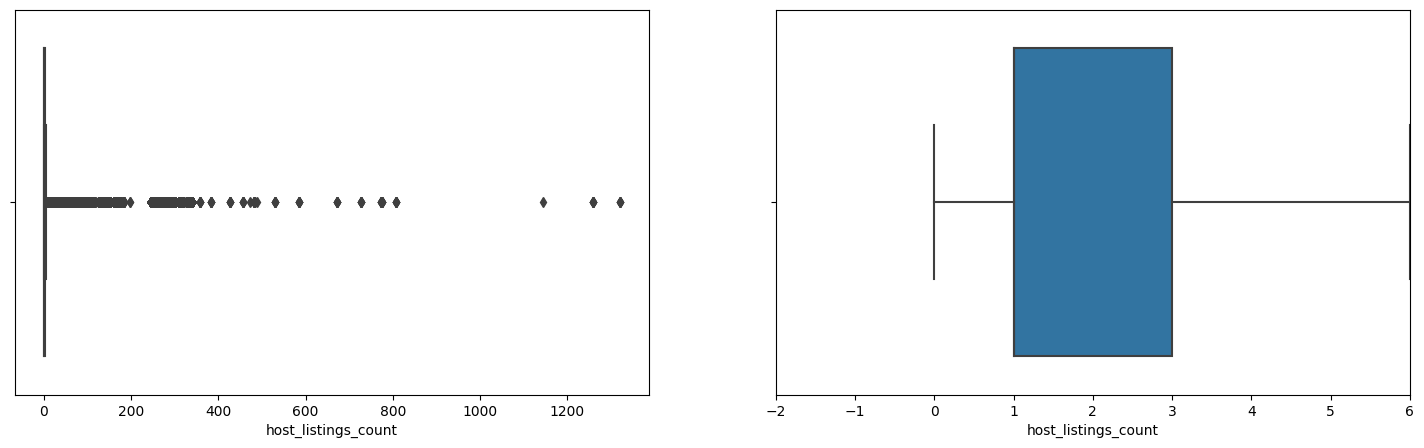

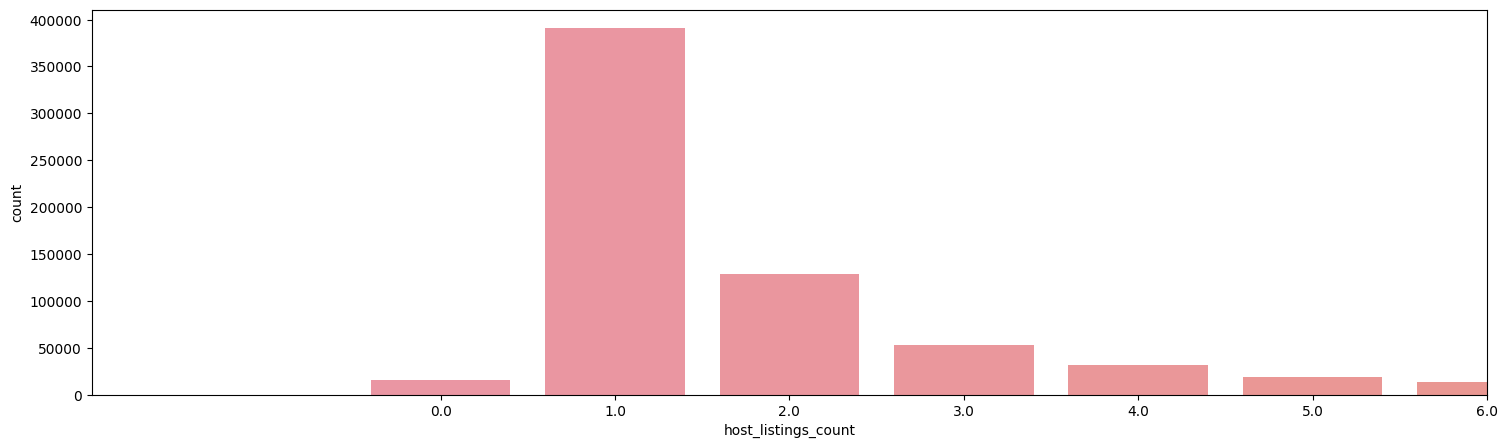

In [22]:
diagrama_caixa(df['host_listings_count'])
grafico_barra(df['host_listings_count'])

Optei por manter os outliers pois o objetivo do modelo seria para pessoas comuns terem como avaliar o preço de imóveis que querem alugar, e mesmo um profissional do ramo, como imobiliária, que possui mais de 6 imóveis, podem ainda oferecer imóveis de pequeno e médio porte dentro de seu portfólio.

#### Accomodates

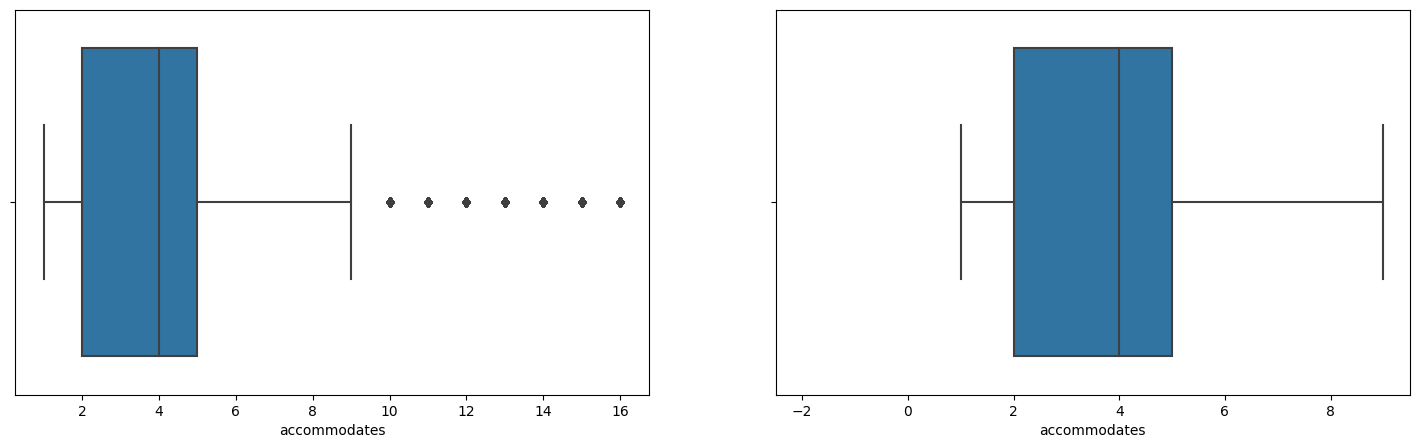

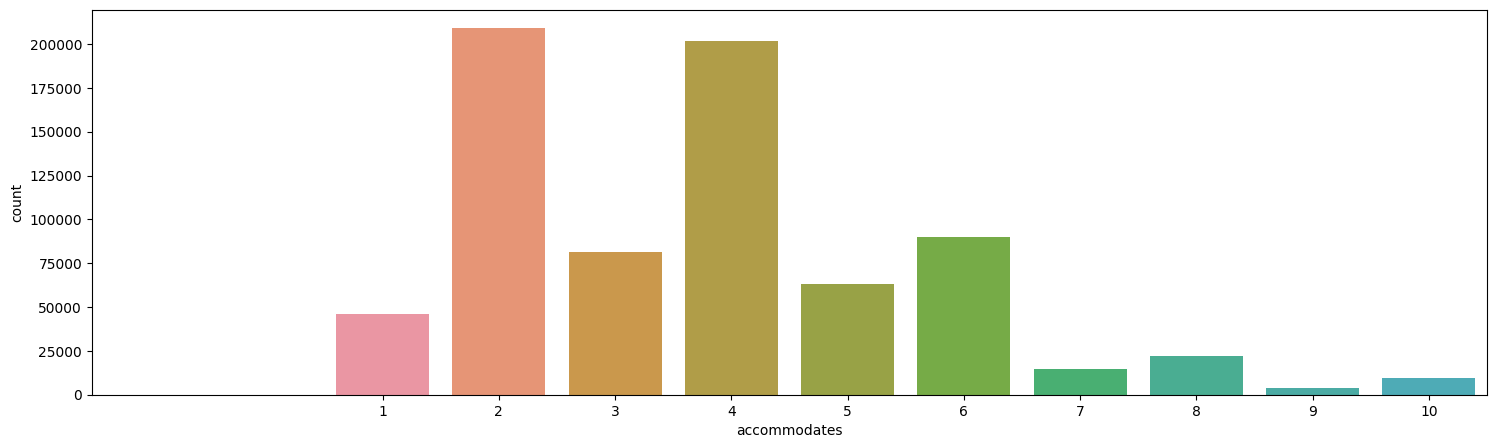

In [23]:
diagrama_caixa(df['accommodates'])
grafico_barra(df['accommodates'])

Pelo baixo volume de outliers, e por accomodates ser uma métrica importante ao se avaliar um imóvel, optei por manter os outliers

#### Bathrooms

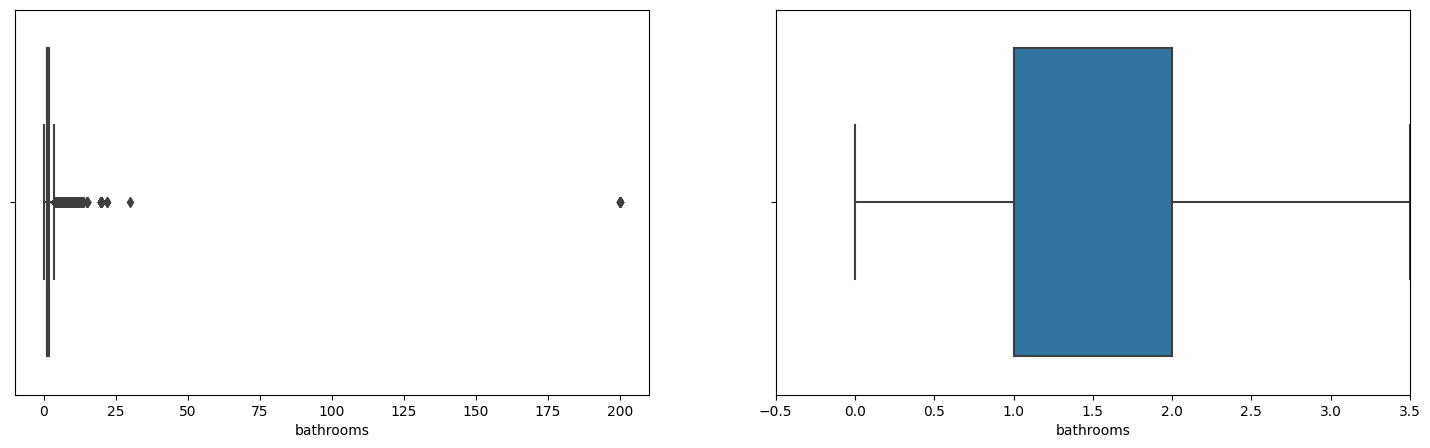

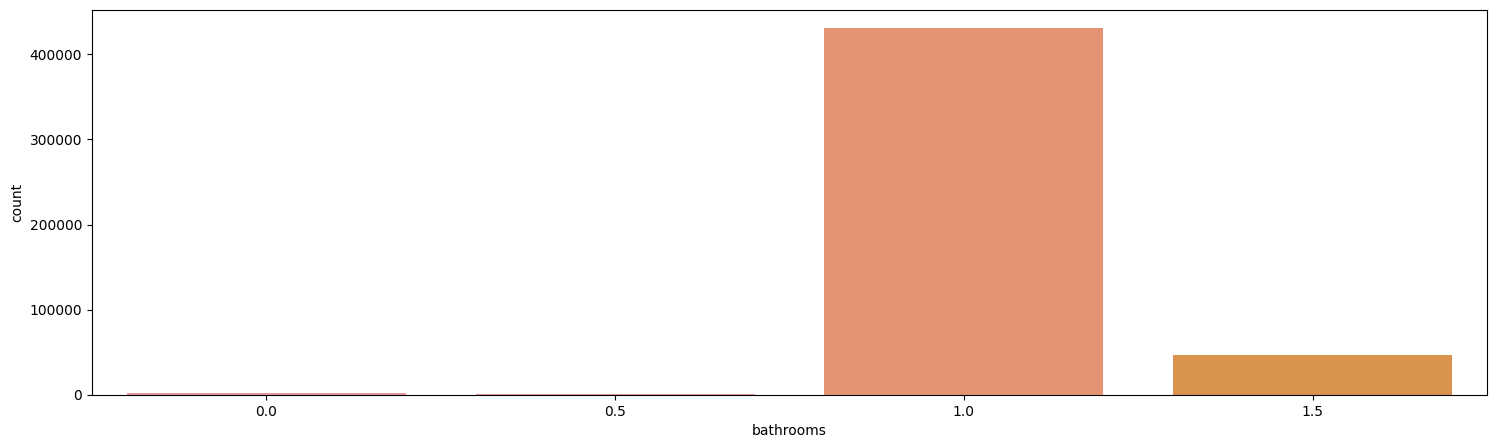

In [24]:
diagrama_caixa(df['bathrooms'])
grafico_barra(df['bathrooms'])

Apesar de banheiros serem uma métrica importante, como existem alguns valores muito acima do limite superior, iremos excluir os outliers

In [25]:
df, qtd_linhas_removidas = excluir_outliers(df, 'bathrooms')
print(f"Quantidade de linhas removidas: {qtd_linhas_removidas}")

Quantidade de linhas removidas: 19796


#### Bedrooms

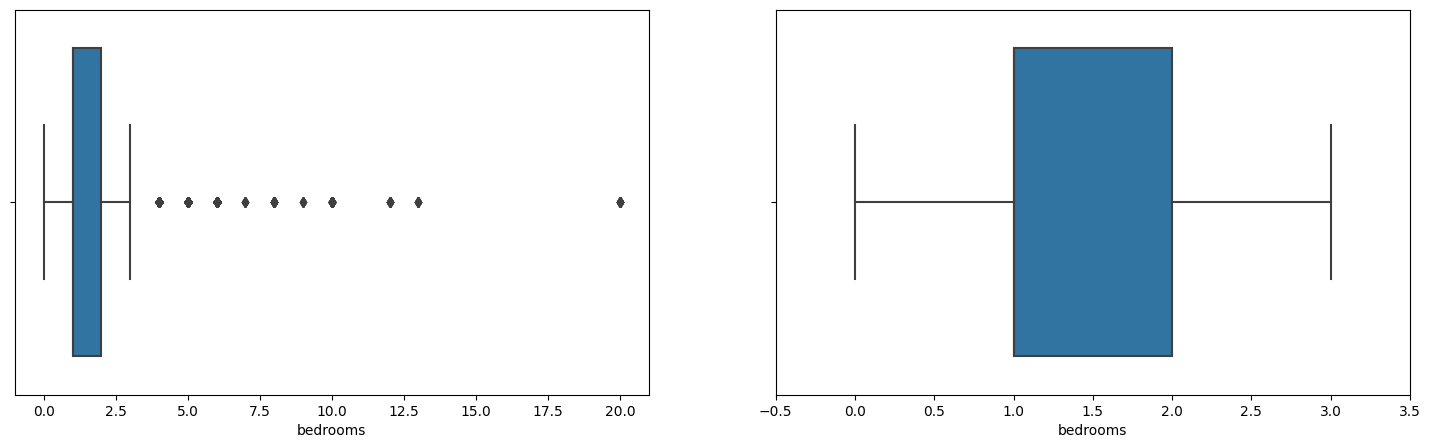

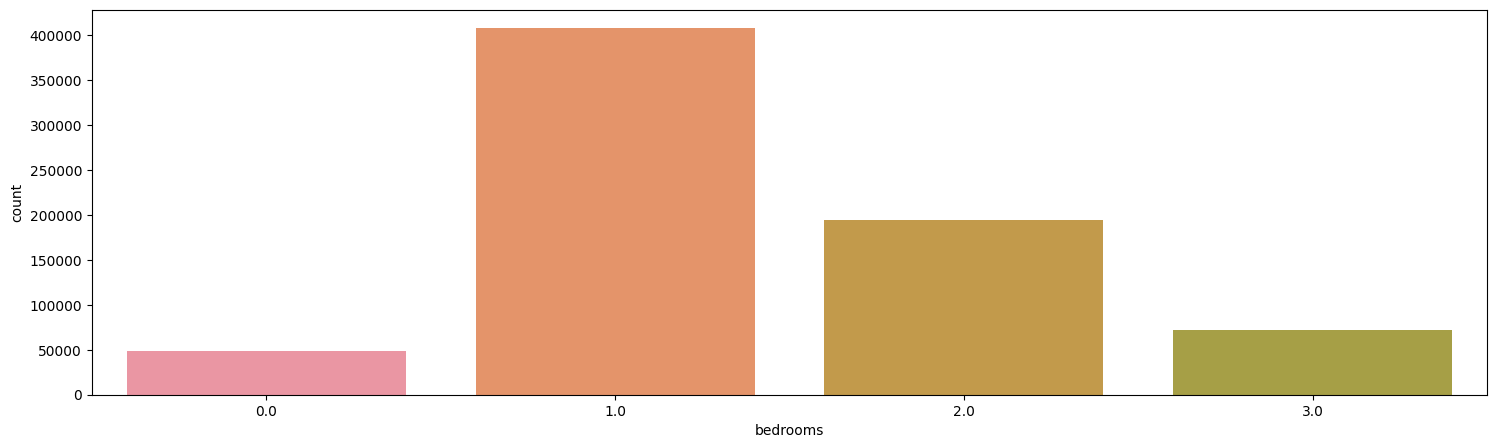

In [26]:
diagrama_caixa(df['bedrooms'])
grafico_barra(df['bedrooms'])

#### Beds

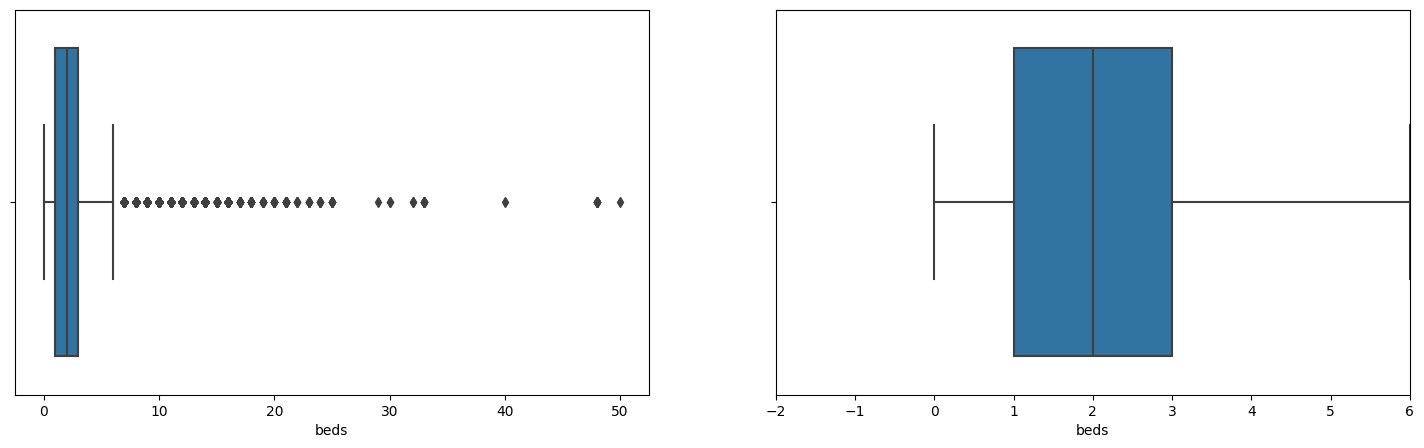

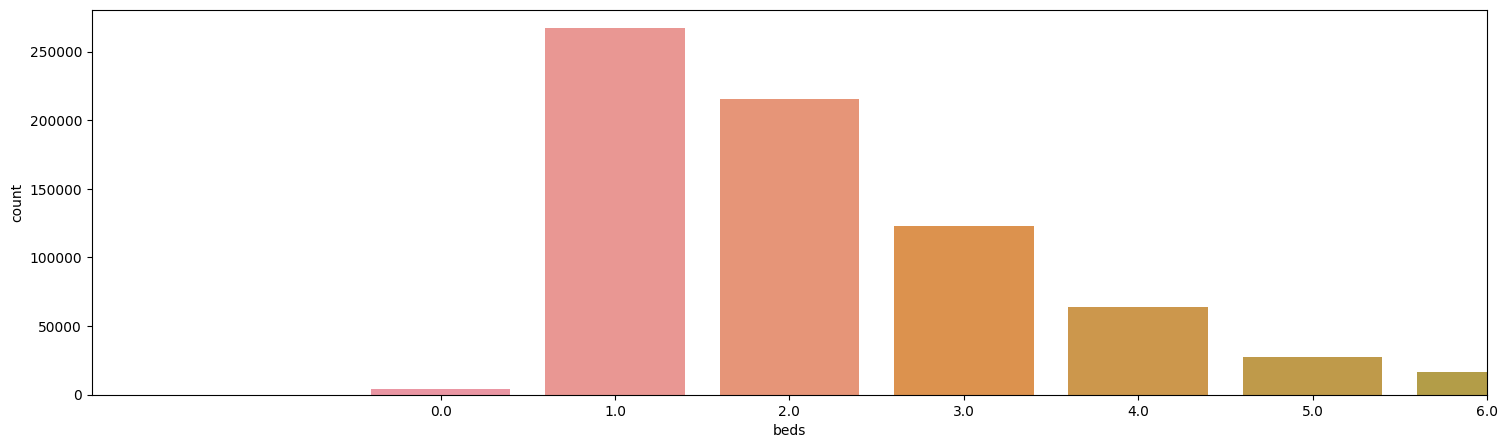

In [27]:
diagrama_caixa(df['beds'])
grafico_barra(df['beds'])

In [28]:
df, qtd_linhas_removidas = excluir_outliers(df, 'beds')
print(f"Quantidade de linhas removidas: {qtd_linhas_removidas}")

Quantidade de linhas removidas: 29415


#### Guests Included

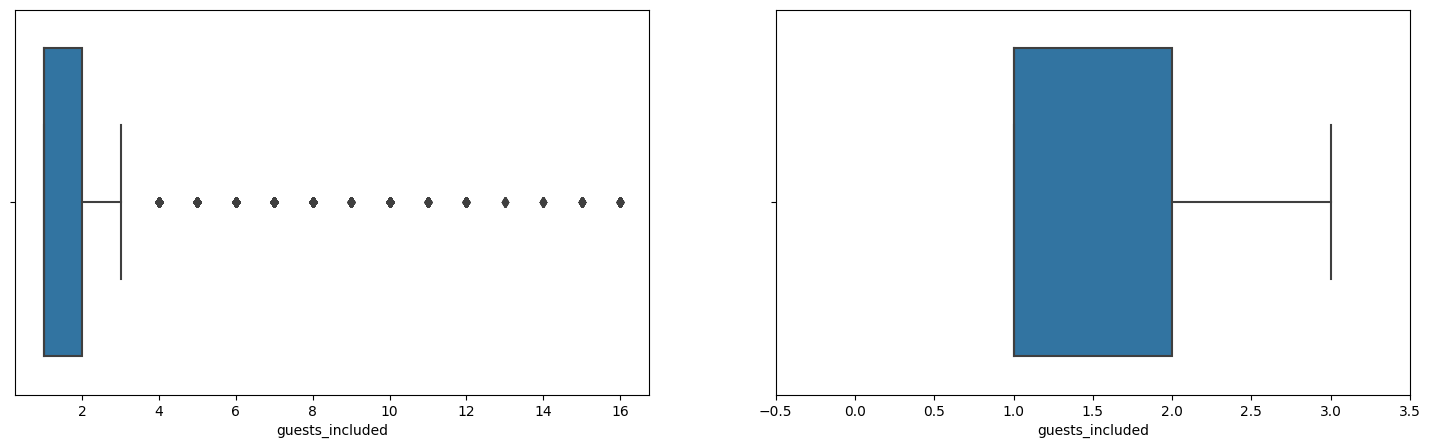

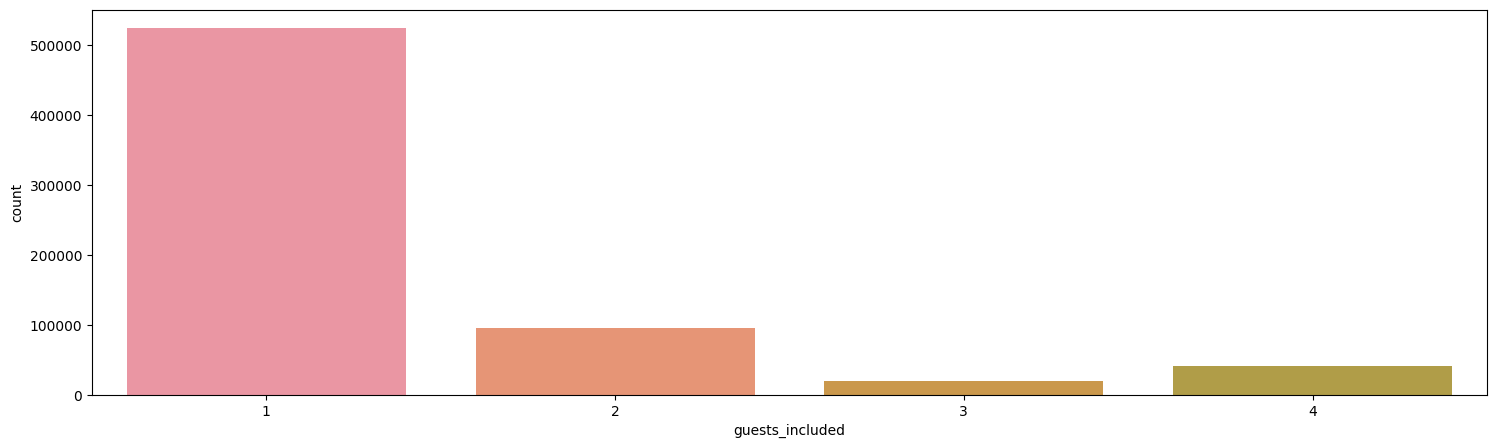

In [29]:
diagrama_caixa(df['guests_included'])
grafico_barra(df['guests_included'])

Com pensamento análogo ao da coluna "accomodates" manteremos a os outliers da coluna "guests included"

#### Minimum Nights

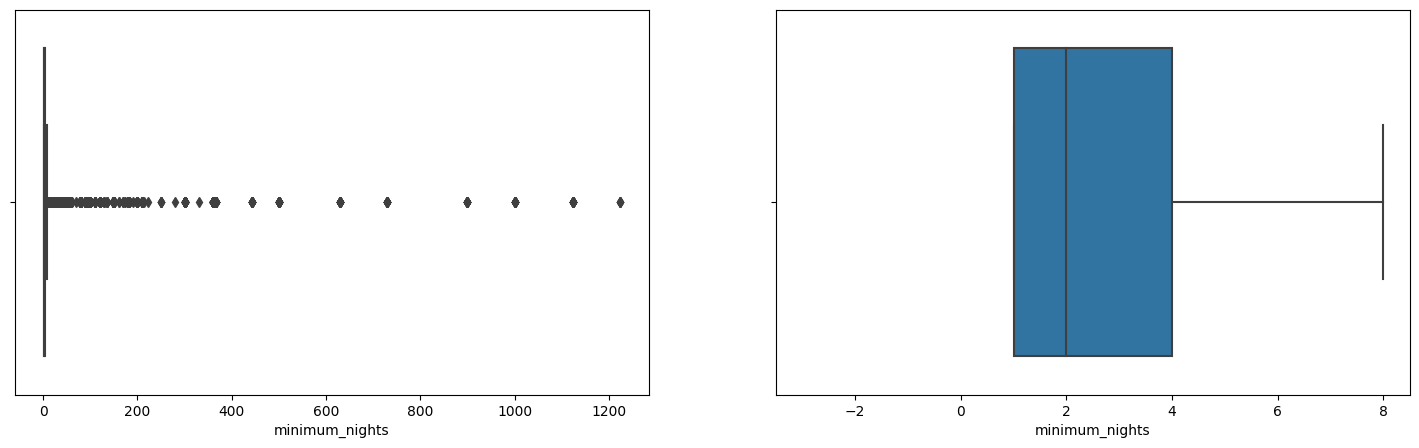

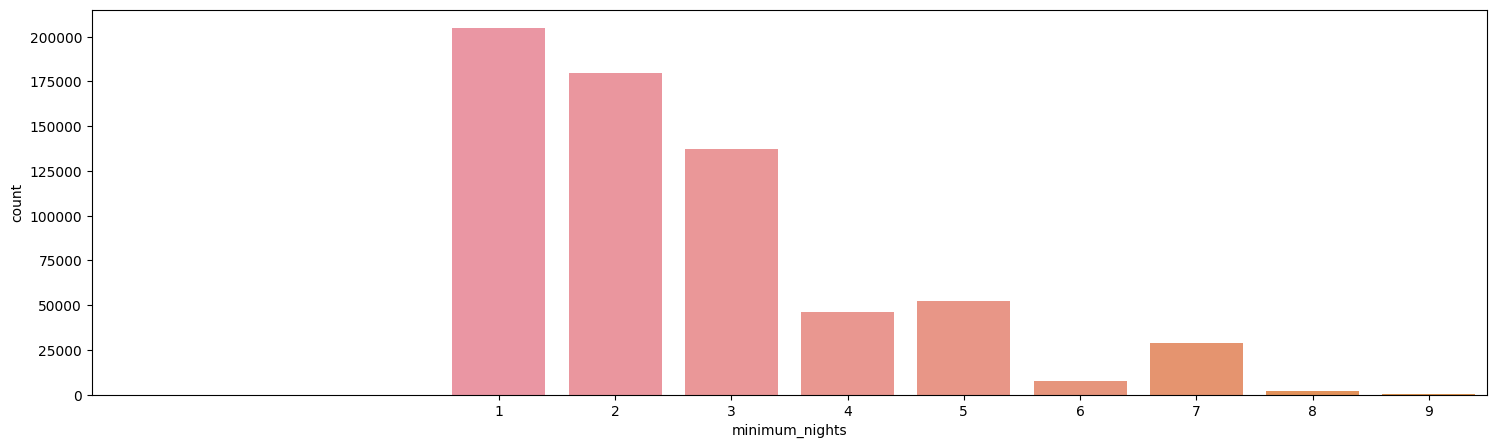

In [30]:
diagrama_caixa(df['minimum_nights'])
grafico_barra(df['minimum_nights'])

Maximum Nights

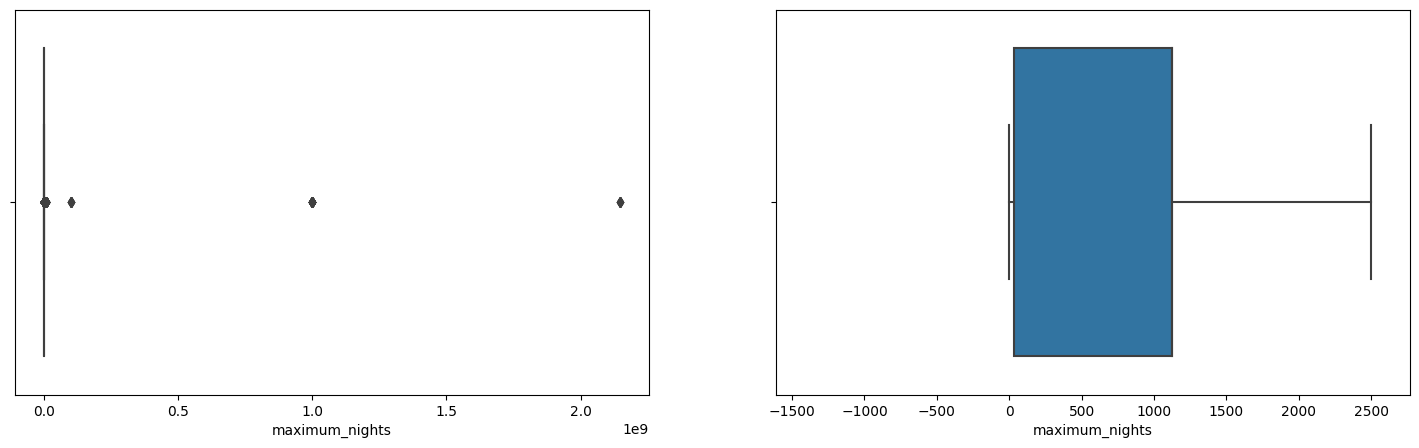

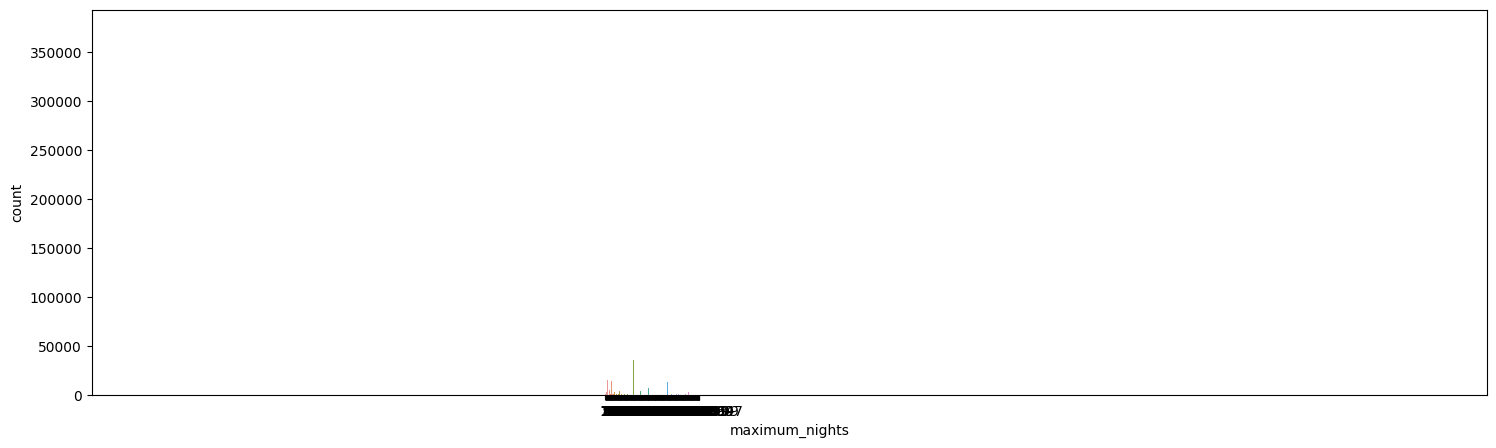

In [31]:
diagrama_caixa(df['maximum_nights'])
grafico_barra(df['maximum_nights'])

A informação de Maximum Nights parece ter valores muito dispersos, provavelmente grande parte dos hosts nem preenchem essa informação ou preenchem com valores muito altos, mas que não parecem razoáveis para um aluguel temporário como os buscados no Airbnb. Sendo assim, vamos optar por remover essa coluna da análise

In [32]:
df = df.drop(columns= 'maximum_nights')

#### Number of reviews

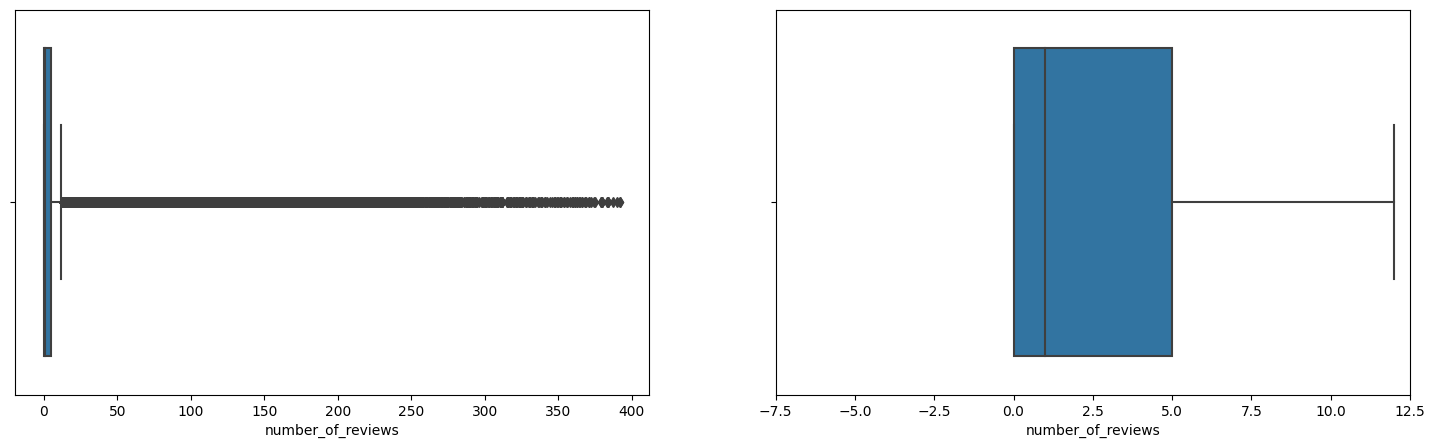

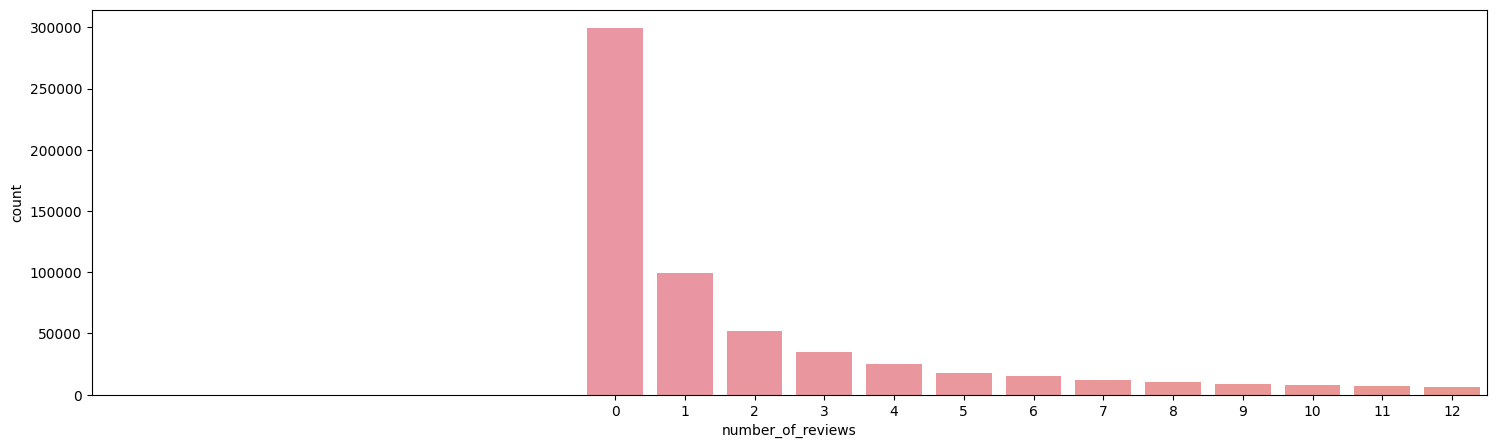

In [33]:
diagrama_caixa(df['number_of_reviews'])
grafico_barra(df['number_of_reviews'])

## Tratamento de valores categóricos

#### Property Type

In [34]:
df['property_type'].value_counts()

property_type
Apartment                 551738
House                      60465
Condominium                31396
Serviced apartment         17730
Loft                       13690
Bed and breakfast           4311
Guest suite                 4256
Hostel                      3319
Other                       2733
Guesthouse                  2631
Villa                       1422
Aparthotel                  1260
Townhouse                   1172
Hotel                       1149
Earth house                  563
Boutique hotel               558
Tiny house                   526
Chalet                       514
Casa particular (Cuba)       329
Cottage                      285
Bungalow                     233
Dorm                         202
Castle                       150
Nature lodge                 131
Cabin                         97
Treehouse                     76
Island                        64
Boat                          47
Hut                           40
Campsite                     

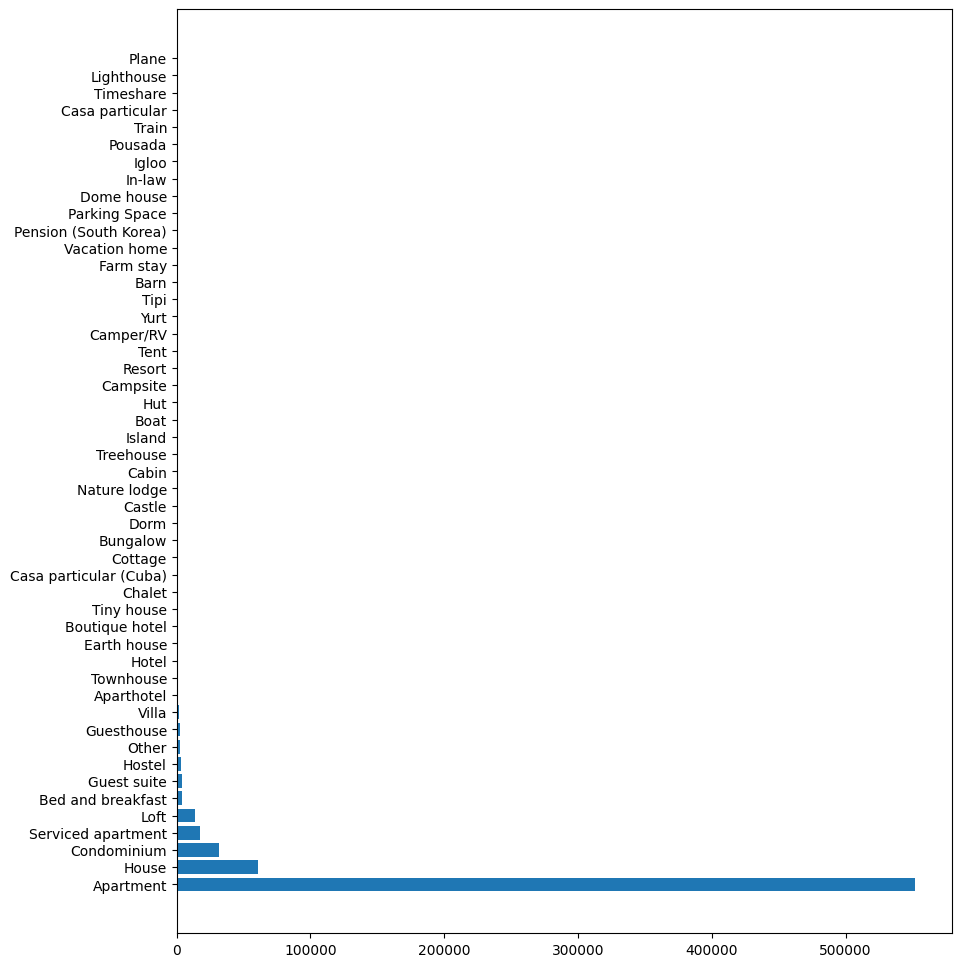

In [35]:
plt.figure(figsize= (10, 12))
plt.barh(df['property_type'].value_counts().index, df['property_type'].value_counts())
plt.show()

Por existirem várias categorias com baixíssimo volume, e com características menos comuns (Ex: Lighthouse, Castel, Treehouse) optamos por aglutinar essas categorias na categoria "Others" para ajuste do modelo

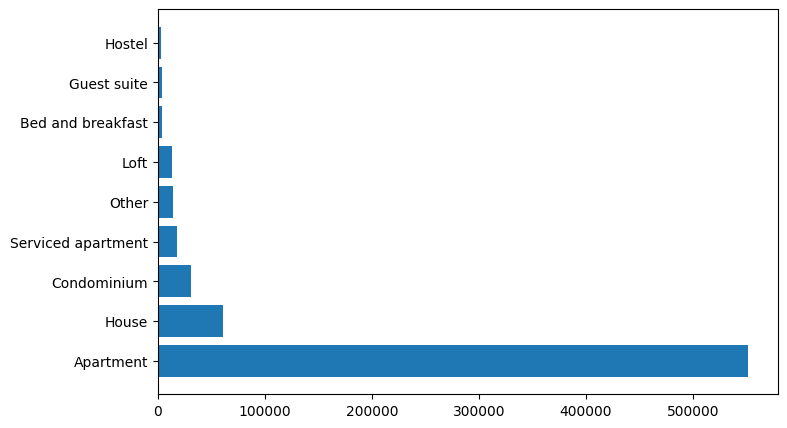

In [36]:
df_property_type = df['property_type'].value_counts()

colunas_agrupar = []

for tipo in df_property_type.index:
    qtd = df_property_type[tipo]
    if qtd < df_property_type['Other']:
        colunas_agrupar.append(tipo)

df['property_type'] = np.where(df['property_type'].isin(colunas_agrupar), 'Other', df['property_type'])

plt.figure(figsize= (8, 5))
plt.barh(df['property_type'].value_counts().index, df['property_type'].value_counts())
plt.show()

#### Room Type

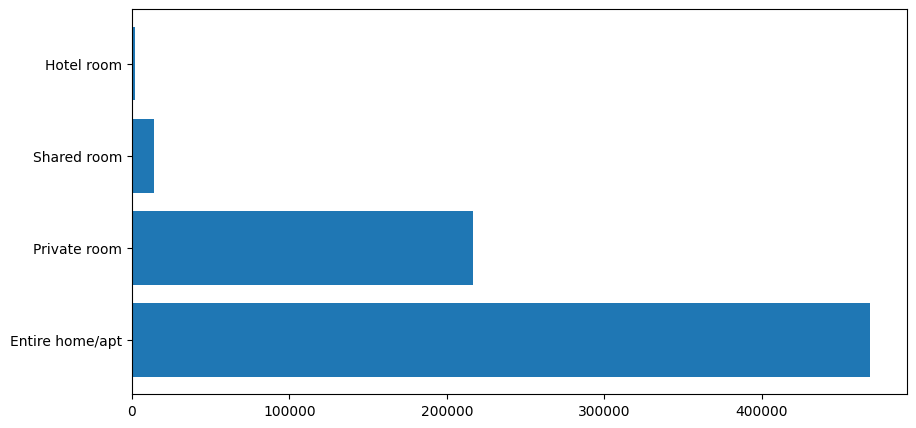

In [37]:
plt.figure(figsize= (10, 5))
plt.barh(df['room_type'].value_counts().index, df['room_type'].value_counts())
plt.show()

#### Bed Type

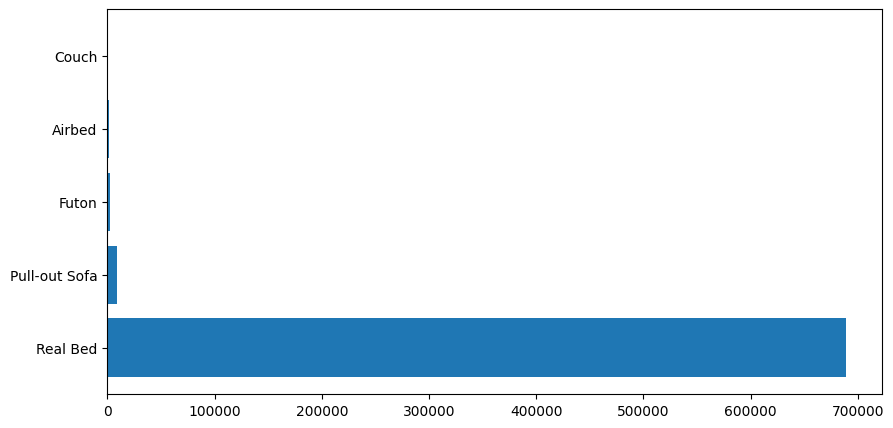

In [38]:
plt.figure(figsize= (10, 5))
plt.barh(df['bed_type'].value_counts().index, df['bed_type'].value_counts())
plt.show()

#### Cancelation Policy

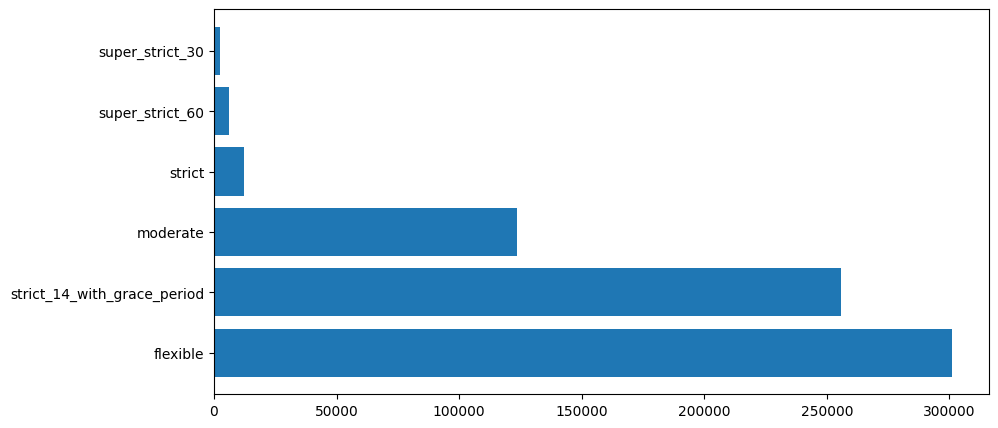

In [39]:
plt.figure(figsize= (10, 5))
plt.barh(df['cancellation_policy'].value_counts().index, df['cancellation_policy'].value_counts())
plt.show()

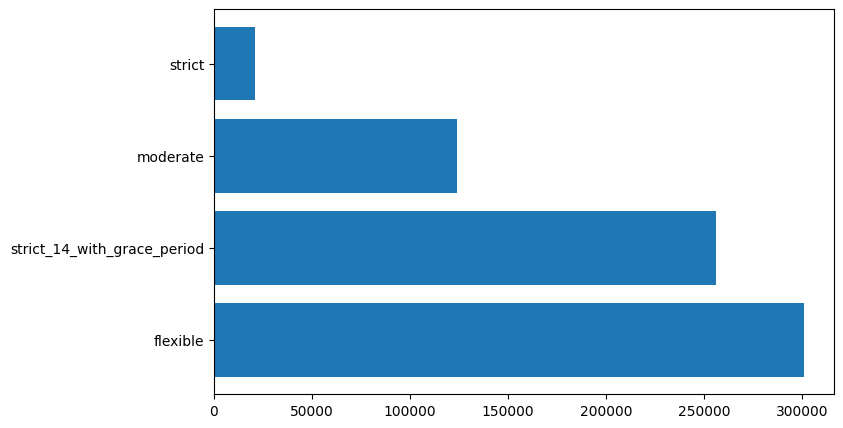

In [40]:
df_cancelation = df['cancellation_policy'].value_counts()

colunas_agrupar = []

for tipo in df_cancelation.index:
    qtd = df_cancelation[tipo]
    if qtd < df_cancelation['moderate']:
        colunas_agrupar.append(tipo)

df['cancellation_policy'] = np.where(df['cancellation_policy'].isin(colunas_agrupar), 'strict', df['cancellation_policy'])

plt.figure(figsize= (8, 5))
plt.barh(df['cancellation_policy'].value_counts().index, df['cancellation_policy'].value_counts())
plt.show()

#### Amenities

Essa coluna é composta por listas, precisando de um tratamento específico

Levando em consideração a dificuldade de tratamento dessa coluna, por ter algumas amenities sem aspas, informações repetidas, iremos utilizar a quantidade de amenites para o modelo. passando a ser uma coluna de valores numéricos, então vamos também excluir esses outliers

In [41]:
df['amenities'] = df['amenities'].apply(lambda x: len(x.split(',')))

df['amenities']

0         25
1         14
2         17
4         31
5         35
          ..
902205     7
902206    19
902207     7
902208    11
902209    16
Name: amenities, Length: 701344, dtype: int64

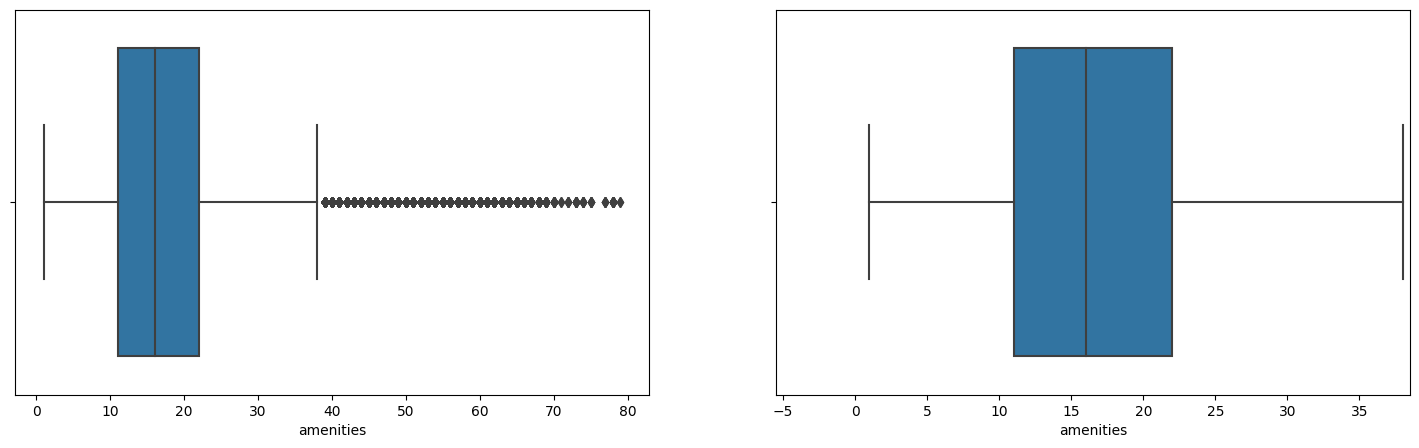

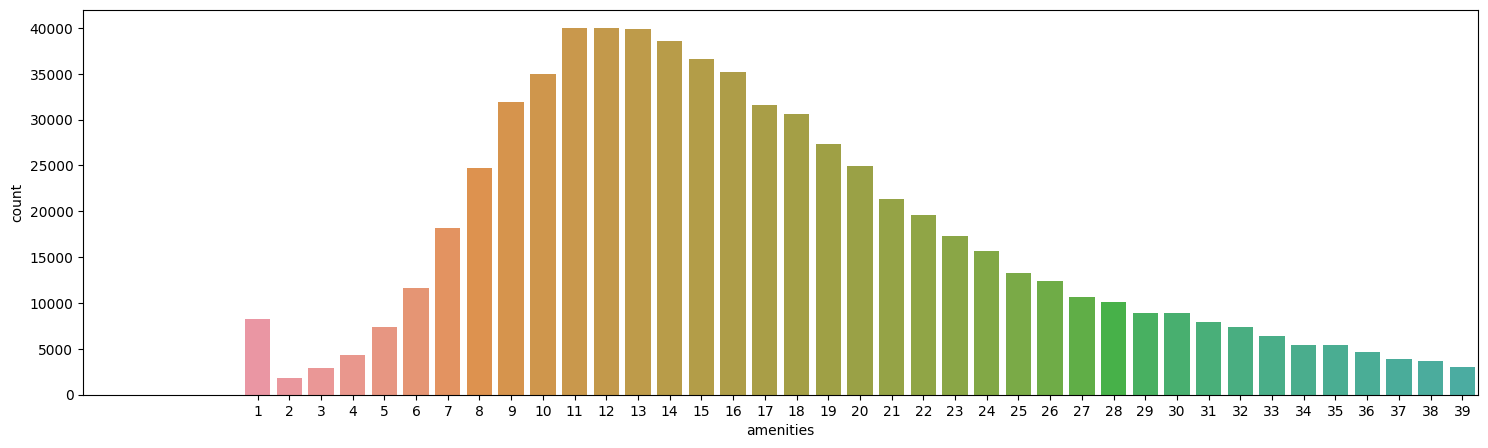

In [42]:
diagrama_caixa(df['amenities'])
grafico_barra(df['amenities'])

In [43]:
df, qtd_linhas_removidas = excluir_outliers(df, 'amenities')
print(f"Quantidade de linhas removidas: {qtd_linhas_removidas}")

Quantidade de linhas removidas: 27586


### Colunas de Localização

In [44]:
amostra = df.sample(n=50000)
centro_mapa = {'lat': amostra['latitude'].mean(), 'lon': amostra['longitude'].mean()}

mapa = px.density_mapbox(amostra, 
                        lat= 'latitude', 
                        lon = 'longitude', 
                        z = 'price', 
                        radius= 2.5,
                        center = centro_mapa,
                        zoom = 10,
                        mapbox_style = 'open-street-map',
                        title = 'Mapa de Densidade de Preços Airbnb Rio de Janeiro',
                        width = 1000,
                        height  = 600,
                        range_color = [0,1500]
                        )

mapa.show()

### Encoding

Ajustar as features para interpretação do modelo. Ou seja, ajuste de variáveis dummy

In [45]:
df.columns

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'number_of_reviews',
       'instant_bookable', 'cancellation_policy', 'year', 'month'],
      dtype='object')

In [46]:
colunas_bool = ['host_is_superhost', 'instant_bookable']

colunas_categ = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']

#### Colunas True ou False

In [47]:
for coluna in colunas_bool:
    df[coluna] = np.where(df[coluna]== 't', 1, 0)

In [48]:
df[colunas_bool]

,host_is_superhost,instant_bookable
0,0,1
1,1,0
2,1,1
4,1,0
5,1,1
...,...,...
902205,0,0
902206,0,0
902207,0,0
902208,0,1


#### Colunas Categóricas

In [49]:
df_cod = df.copy() #cópia para não modificar os dados do df original

Criação das dummies

In [50]:
df_cod = pd.get_dummies(data = df_cod, columns= colunas_categ)

In [51]:
df_cod

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,...,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period
0,0,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,25,295.0,...,False,False,False,False,False,True,False,False,False,True
1,1,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,14,160.0,...,False,False,False,False,False,True,False,False,False,True
2,1,1.0,-22.983024,-43.214270,3,1.0,1.0,2.0,17,242.0,...,False,False,False,False,False,True,False,False,False,True
4,1,1.0,-22.988165,-43.193588,3,1.5,1.0,2.0,31,336.0,...,False,False,False,False,False,True,False,False,False,True
5,1,1.0,-22.981269,-43.190457,2,1.0,1.0,2.0,35,220.0,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,0,3.0,-22.922762,-43.178087,2,1.0,2.0,2.0,7,78.0,...,False,False,False,False,False,True,False,True,False,False
902206,0,1.0,-22.820039,-43.375005,4,3.0,2.0,3.0,19,400.0,...,False,False,False,False,False,True,True,False,False,False
902207,0,1.0,-22.945188,-43.182852,2,1.0,1.0,1.0,7,97.0,...,False,False,False,False,False,True,True,False,False,False
902208,0,2.0,-22.923240,-43.226054,7,2.0,1.0,1.0,11,43.0,...,False,False,False,False,False,True,True,False,False,False


### Modelo de Previsão

Modelos escolhidos para estimação:
- Regressão Linear
- Random Tree
- Extra Trees

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [54]:
random_forest = RandomForestRegressor()
linear_reg    = LinearRegression()
extra_tree    = ExtraTreesRegressor() 

modelos = {'Random Forest'    : random_forest,
           'Linear Regression': linear_reg,
           'Extra Tree'       : extra_tree}

y = df_cod['price']
x = df_cod.drop(columns= 'price')

In [55]:
def avaliacao_modelo(nome_modelo, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    rsme = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'\nModelo: {nome_modelo}-----------------------------\nR²: {r2}\nRSME: {rsme}')

#### Separar em treino e teste

In [62]:
from datetime import datetime

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.8)

for nome_modelo, modelo in modelos.items():
    # Train
    modelo.fit(x_train, y_train)
    print(f'Modelo {modelo} treinado {datetime.now()}')
    # Teste
    y_pred = modelo.predict(x_test)
    avaliacao_modelo(nome_modelo, y_test, y_pred)


Modelo RandomForestRegressor() treinado 2024-01-14 17:21:13.878403

Modelo: Random Forest-----------------------------
R²: 0.9691729322830334
RSME: 47.944447139443696
Modelo LinearRegression() treinado 2024-01-14 17:21:26.343263

Modelo: Linear Regression-----------------------------
R²: 0.3354282253323516
RSME: 222.60922255985753
Modelo ExtraTreesRegressor() treinado 2024-01-14 17:28:57.510227

Modelo: Extra Tree-----------------------------
R²: 0.9749329753347129
RSME: 43.23381909525166


### Análise do Melhor Modelo

Os modelos Random Forest e Extra Trees tiveram resultados parecidos, mas **Extra Trees** teve métricas ligeiramente melhores por ter R² maior e Erro Quadrático Médio (RSME) menor. Portanto seguiremos com o modelo de **Extra Trees** como modelo escolhido para previsão

In [64]:
importances = extra_tree.feature_importances_

print(importances)

[0.01106063 0.04564338 0.08601677 0.08512621 0.06594338 0.10273869
 0.07095758 0.04155577 0.06781045 0.01912259 0.07160135 0.06947602
 0.06979832 0.01718373 0.01023551 0.00516099 0.01067566 0.00096828
 0.00429472 0.0005711  0.00056047 0.00580119 0.00192688 0.00256323
 0.00230511 0.08583779 0.00032382 0.00260427 0.00152125 0.00033482
 0.00040948 0.00055537 0.00207091 0.00181973 0.01583946 0.01024243
 0.00180438 0.00753828]


In [68]:
x_test.columns 

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
       'guests_included', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'instant_bookable', 'year', 'month',
       'property_type_Apartment', 'property_type_Bed and breakfast',
       'property_type_Condominium', 'property_type_Guest suite',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')

In [71]:
importances_df = pd.DataFrame()

importances_df['Features']    = x_test.columns 
importances_df['Importances'] = importances

importances_df

,Features,Importances
0,host_is_superhost,0.011061
1,host_listings_count,0.045643
2,latitude,0.086017
3,longitude,0.085126
4,accommodates,0.065943
5,bathrooms,0.102739
6,bedrooms,0.070958
7,beds,0.041556
8,amenities,0.067810
9,guests_included,0.019123


In [ ]:
plt.figure(figsize= (8, 14))
bars = plt.barh(importances_df['Features'], importances_df['Importances'])
plt.bar_label(bars, 
              labels=importances_df['Importances'].apply(lambda x: f'{x:.3f}'), 
              padding=3, fontsize=10)
plt.xlim(0, max(importances_df['Importances'])*1.1)
plt.show()

### Ajustes e Melhorias no Melhor Modelo